<a href="https://colab.research.google.com/github/flaviowu/btc-c14-g4/blob/main/notebooks/Analise_da_descri%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tratamento nos Dados: Lucas - Drop linhas Duplicados ✔

### Leitura dos Dados

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd 
import numpy as np

In [3]:
train = pd.read_csv('/content/drive/MyDrive/BTC-Dados-G4/train_clean_rev2.csv')
test = pd.read_csv('/content/drive/MyDrive/BTC-Dados-G4/train_clean_rev2.csv')

### Código Prof. Thiago

In [4]:
from numpy import random
def data(n, seed):

    datas = []
    
    random.seed(seed)
    for i in range(n):
        dia_maximo = 30
        dia_minimo = 1
        mes_maximo = 12
        mes_minimo = 1
        
        dia = int(random.random() * (dia_maximo - dia_minimo) + dia_minimo)
        mes = int(random.random() * (mes_maximo - mes_minimo) + mes_minimo)
        
        datas.append(str(dia)+'-'+str(mes)+'-2018')
        
    return datas

def estoque(n, seed):

    np.random.seed(seed)
    mu, sigma = 1, 20
    s = np.random.normal(mu, sigma, n)
    s[s < 0] = s[s < 0] * -0.5
    s = s.astype(int)
    s[s < 1] = 1
    
    return s

train['date']  = data(n = train.shape[0], seed = 10)
train['stock'] = estoque(n = train.shape[0], seed = 10)

### Drop Linhas Dúplicadas

In [5]:
def Apaga_Duplicado(data='x', colunas=['y']):
  data = data.drop_duplicates(subset = colunas, keep= 'first', inplace = False)
  return data

In [6]:
train = Apaga_Duplicado(train, ['name','brand_name','price'])

In [7]:
train.shape

(1406667, 11)

## Analisar o campo de DESCRIÇÃO ✔

### Import Bibliotecas

In [8]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [9]:
from nltk.corpus import stopwords
import re
import collections

In [10]:
from spacy.tokens import Span

In [11]:
import spacy
import spacy.cli
spacy.cli.download('en')

nlp = spacy.load('en_core_web_sm')

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


### Criando Funções

In [12]:
amostra = train.head(7000)

In [13]:
def limpa_texto(data, col): 
  """
  retira pontuações e caracteres especiais, incluindo no df o resultado
  """
  data[col] = data[col].str.lower()
  data[col] = data[col].apply(lambda x: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", '', x))

In [14]:
limpa_texto(amostra, 'item_description')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
amostra['item_description']

0                                      no description yet
1       this keyboard is in great condition and works ...
2       adorable top with a hint of lace and a key hol...
3       new with tags leather horses retail for rm eac...
4               complete with certificate of authenticity
                              ...                        
7005                             floral romper euc size m
7006       mens nike free 40 flyknit nwt sizes 105 and 11
7007    excellent condition disc would give about 8810...
7008    nib universal front  back truckcarsuvsvans sea...
7009    brand new deluxe travel softener  toner in gla...
Name: item_description, Length: 7000, dtype: object

In [16]:
def remove_numeros(dados='x', coluna='y'):
  identifica_numero = dados[coluna].str.split().dropna()
  lista_sem_numeros = []

  for palavra in identifica_numero:
    for elemento in palavra:
      if type(elemento) is float or type(elemento) is int:
        ''
      else:
        lista_sem_numeros.append(elemento)

  return lista_sem_numeros

In [17]:
lista_sem_numeros = remove_numeros(amostra, 'item_description')

In [18]:
def frequencia_de_palavras(lista):

  ''' Identifica o numero de repetições de cada palavra no texto '''
  
  palavras_comuns = stopwords.words('english')
  lista = [palavra for palavra in lista if palavra not in palavras_comuns]

  return collections.Counter(lista)

In [19]:
freq_palavras = frequencia_de_palavras(lista_sem_numeros)

In [20]:
def data_frame_de_frequencia(x):  
  
  ''' Cria um DataFrame com a Frequencia das Palavras '''

  lista_de_palavras = []
  lista_frequencia = []
  for palavra, frequencia in x.items():
    lista_de_palavras.append(palavra)
    lista_frequencia.append(frequencia)
  return pd.DataFrame(
    {'lista_de_palavras': lista_de_palavras,
     'lista_frequencia': lista_frequencia}
      )

In [21]:
dados_de_frequência = data_frame_de_frequencia(freq_palavras)

In [22]:
dados_de_frequência.sort_values('lista_frequencia', ascending=False)

,lista_de_palavras,lista_frequencia
34,new,2356
66,size,2014
161,brand,1300
48,free,1163
4,condition,1138
...,...,...
3111,jdi,1
8384,dreamworks,1
8383,clarinet,1
3114,10fl,1


In [23]:
def entidades_do_texto(lista_palavras):

  ''' Revela quais entidades temos nos textos '''

  entidades = []
  for ent in lista_palavras.ents:
    entidades.append(ent.label_)

  entidades = sorted(set(entidades))
  return entidades

### Analisando entidades

In [24]:
unir_palavras = " ".join(lista_sem_numeros)
unir_palavras = nlp(unir_palavras)

In [25]:
nome_de_empresas = []
for ent in unir_palavras.ents:
  if ent.label_ == 'ORG':
    nome_de_empresas.append(ent.text)

In [26]:
#Aplicação de funções 

mais_comentadas = frequencia_de_palavras(nome_de_empresas)
mais_comentadas = data_frame_de_frequencia(mais_comentadas)

In [27]:
mais_comentadas.sort_values('lista_frequencia', ascending=False, inplace=True)
mais_comentadas.head(5)

,lista_de_palavras,lista_frequencia
0,nwt,85
7,navy,45
62,samsung,36
5,l,17
51,charlotte russe,13


In [28]:
entidades_do_texto(unir_palavras)

['CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART']

In [29]:
empresas = mais_comentadas['lista_de_palavras'].values
print('Existem', len(empresas), 'Empresas registradas na coluna Descrição nesta amostra de:', len(amostra))

Existem 292 Empresas registradas na coluna Descrição nesta amostra de: 7000


## Criar Insights ✔

### Visualização

In [30]:
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [31]:
grafico_nuvem = str(unir_palavras)

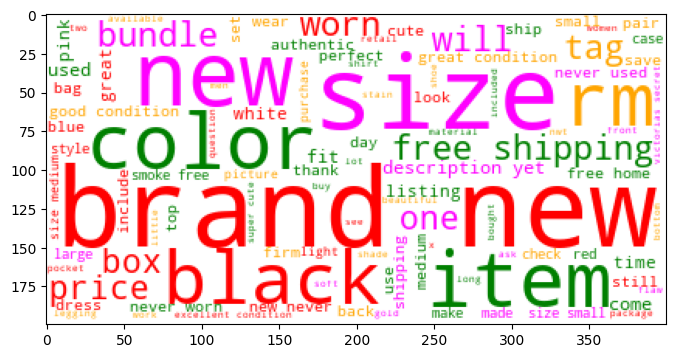

In [32]:
mapa_cores = ListedColormap(['orange','green','red','magenta'])
nuvem = WordCloud(background_color= 'white', 
                  colormap = mapa_cores,
                  max_words = 100)
nuvem.generate(grafico_nuvem)
plt.figure(figsize=(8,6), dpi=100)
plt.imshow(nuvem)

### 🔮 

1 - A coluna de Descrição apresenta informações como **Cor, Condição do Item, Marca, Data**... Através desses dados o algoritimo poderá reconhecer padrões e ajudar a classifcar melhor.

2 - Podemos criar um atributo que agrupe produtos com preço acima, abaixo ou dentro da média de consumo e verificar se as palavras comuns para diferentes categorias de itens também são distintas. Se forem, esses dados poderão melhoras eficiência do Modelo. 

## Hipóteses ✔

Os nomes das empresas aparecem na Descrição. Podemos usar essa informação para preencher os dados nulos de marca? Ou utilizando a Descrição junto as demais colunas a marca se torna irrelevante para o classificador?



## Construção de Modelos

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
X_train_counts = vectorizer.fit_transform(documentos_titulo)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X_new = X_train_tfidf

In [ ]:
split_validation = train_test_split(X_new, y, sinopses, test_size=0.20, stratify = y, random_state=10)

(X_train, X_test)             = split_validation[:2]
(y_train, y_test)             = split_validation[2:4]
(titulos_train, titulos_test) = split_validation[4:]

svm = SGDClassifier() 
clf = OneVsRestClassifier(svm)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print('Resultado F1: {:.4f}'.format( f1_score(y_test, y_pred, average="micro")))
print('Acurácia', round(accuracy_score(y_test, y_pred), 3))